### Identificando e Removendo Outliers

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 6))

In [ ]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep=';')

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
dados[dados['Valor'] >= 500000]

In [ ]:
dados.boxplot(['Valor'])

In [ ]:
Q1 = dados['Valor'].quantile(0.25)
Q3 = dados['Valor'].quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ)

In [ ]:
selection = (dados['Valor'] >= limite_inferior) & (dados['Valor'] <= limite_superior)
dados_new = dados[selection]

In [ ]:
dados_new.boxplot(['Valor'])

In [ ]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

In [ ]:
dados.boxplot((['Valor']), by = ['Tipo'])

In [ ]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [ ]:
type(grupo_tipo)

In [ ]:
grupo_tipo.groups

In [ ]:
Q1 = grupo_tipo.quantile(0.25)
Q3 = grupo_tipo.quantile(0.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - (1.5 * IIQ)
limite_superior = Q3 + (1.5 * IIQ)

In [38]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selection = eh_tipo & eh_dentro_limite
    dados_selection = dados[selection]
    dados_new = pd.concat([dados_new, dados_selection])	

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

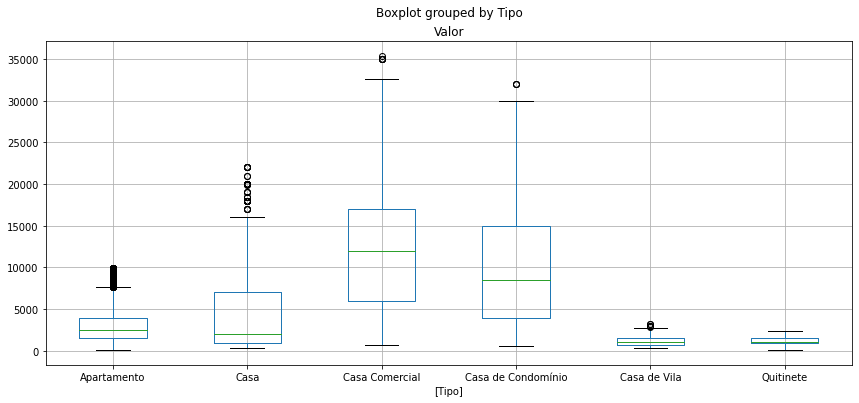

In [40]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [41]:
dados_new.to_csv('data/aluguel_residencial_sem_outliers.csv', sep=';', index = False)